<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>March 2, 2018: compositional inverse
<br>February 26, 2018: splitting from generic nb
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Ctors for (symbolic) Riordan arrays.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t, alpha

init_printing()

In [2]:
%run ../../src/sequences.py

In [3]:
m = 8

d_fn, h_fn = Function('d'), Function('h')
d, h = IndexedBase('d'), IndexedBase('h')

---

## By series convolution

In [4]:
d_series = Eq(d_fn(t), sum(d[i]*t**i for i in range(m))).subs({d[0]:1})
h_series = Eq(h_fn(t), t*sum(h[i]*t**i for i in range(m-1))).expand().subs({h[0]:1})

d_series, h_series

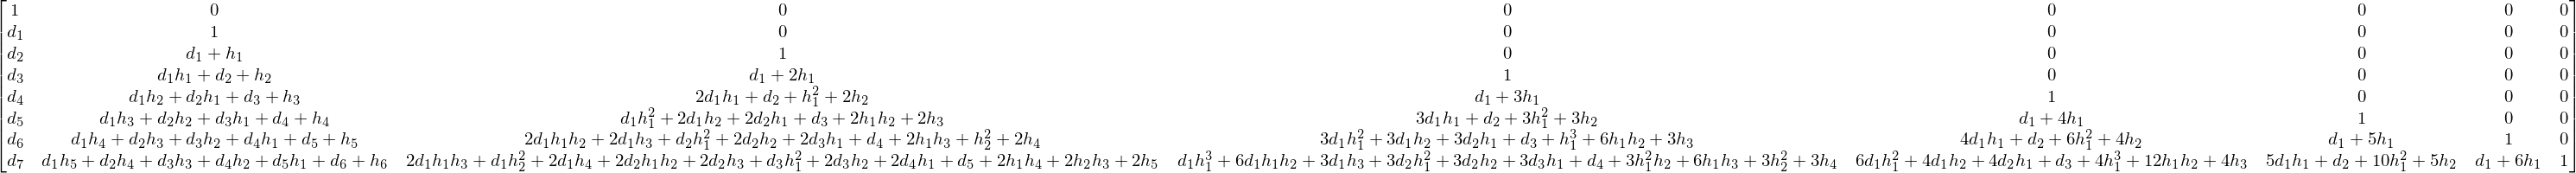

In [5]:
R = Matrix(m, m, riordan_matrix_by_convolution(m, d_series, h_series))
R

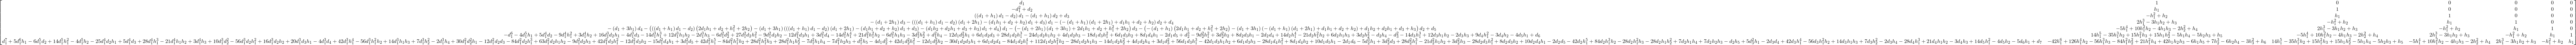

In [6]:
production_matrix(R)

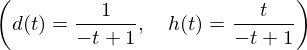

In [7]:
d_series = Eq(d_fn(t), 1/(1-t))
h_series = Eq(h_fn(t), t*d_series.rhs)

d_series, h_series

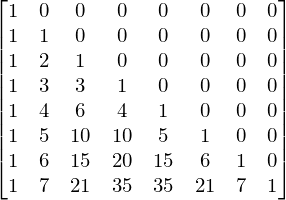

In [8]:
R = Matrix(m, m, riordan_matrix_by_convolution(m, d_series, h_series))
R

## By recurrence relation

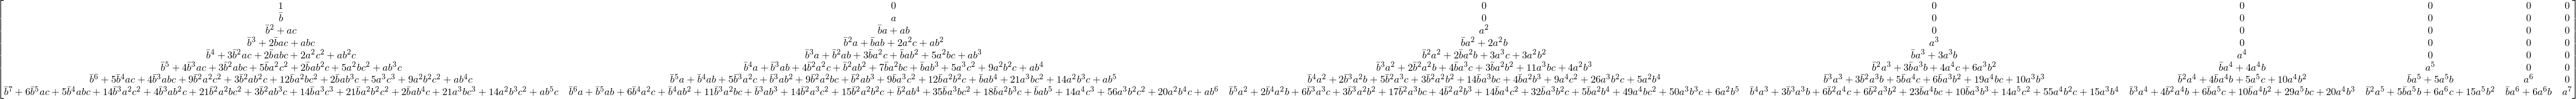

In [9]:
dim = m
a, b, b_bar, c = symbols(r'a b \bar{b} c')
M = Matrix(dim, dim, riordan_matrix_by_recurrence(dim, lambda n, k: {(n-1, k-1):a, 
                                                                     (n-1, k): b if k else b_bar, 
                                                                     (n-1, k+1):c}))
M

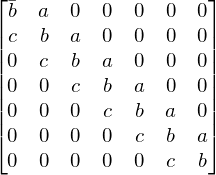

In [5]:
production_matrix(M)

## By $A, Z$ sequences

### $\mathcal{P}$

In [10]:
A = Function('A')
A_one_t = Eq(A(t), 1 + t)
A_one = Eq(A(t),1)
A_one, A_one_t

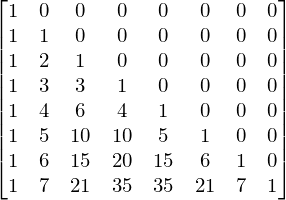

In [11]:
R = Matrix(m, m, riordan_matrix_by_AZ_sequences(dim, (A_one, A_one_t)))
R

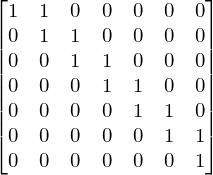

In [12]:
production_matrix(R)

### $\mathcal{C}$

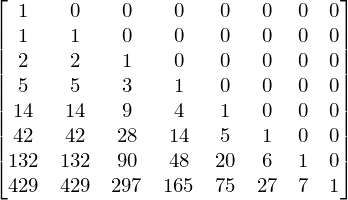

In [16]:
A = Function('A')
A_ones = Eq(A(t), 1/(1-t))
R = Matrix(m, m, riordan_matrix_by_AZ_sequences(dim, (A_ones, A_ones)))
R

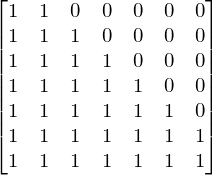

In [17]:
production_matrix(R)

### $\mathcal{R}$

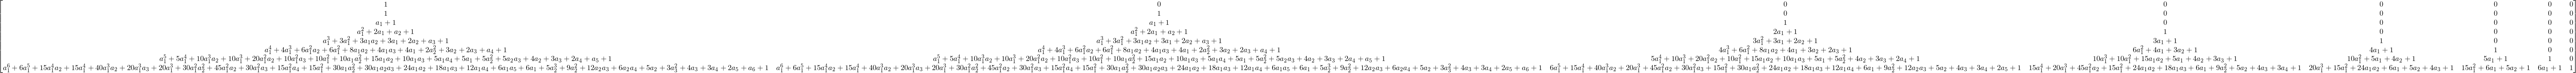

In [18]:
A = Function('A')
a = IndexedBase('a')
A_gen = Eq(A(t), sum((a[j] if j else 1)*t**j for j in range(dim)))
R = Matrix(m, m, riordan_matrix_by_AZ_sequences(dim, (A_gen, A_gen)))
R

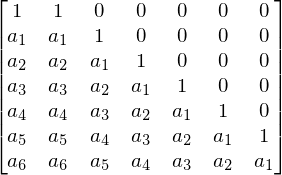

In [19]:
production_matrix(R)

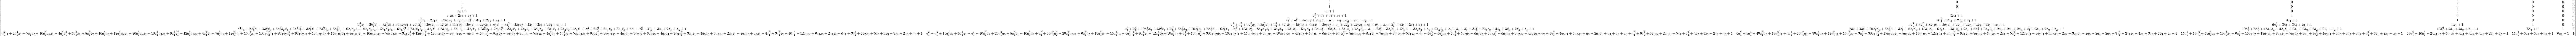

In [20]:
A, Z = Function('A'), Function('Z')
a, z = IndexedBase('a'), IndexedBase('z')
A_gen = Eq(A(t), sum((a[j] if j else 1)*t**j for j in range(dim)))
Z_gen = Eq(Z(t), sum((z[j] if j else 1)*t**j for j in range(dim)))
R = Matrix(m, m, riordan_matrix_by_AZ_sequences(dim, (Z_gen, A_gen)))
R

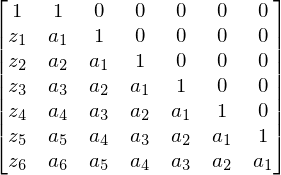

In [21]:
production_matrix(R)

## Compositional inverse

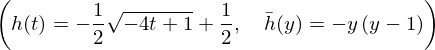

In [14]:
H = Function('h')
C_eq = Eq(H(t), (1-sqrt(1-4*t))/2)
C_eq, compositional_inverse(C_eq)

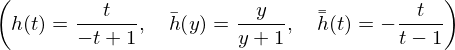

In [22]:
P_eq = Eq(H(t), t/(1-t))
P_eq, compositional_inverse(P_eq), compositional_inverse(compositional_inverse(P_eq), y=t)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.